In [17]:
## This notebook is an exploration of the UFC's weight classes. Fans often debate which division is the strongest, and which is the weakest. I wanted to see if the data had any answers.

In [1]:
import json
import requests
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
r = requests.get("http://ufc-data-api.ufc.com/api/v3/us/fighters")
contentStr = r.content
fighters = json.loads(contentStr)

In [3]:
def abbreviate_weight_class( weight_class ):
	if weight_class == "Flyweight":
		return "FLW"
	elif weight_class == "Bantamweight":
		return "BW"
	elif weight_class == "Featherweight":
		return "FW"
	elif weight_class == "Lightweight":
		return "LW"
	elif weight_class == "Welterweight":
		return "WW"
	elif weight_class == "Middleweight":
		return "MW"
	elif weight_class == "Light_Heavyweight":
		return "LHW"
	elif weight_class == "Heavyweight":
		return "HW"
	elif weight_class == "Women_Strawweight":
		return "WSW"
	elif weight_class == "Women_Flyweight":
		return "WFLW"
	elif weight_class == "Women_Bantamweight":
		return "WBW"
	elif weight_class == "Women_Featherweight":
		return "WFW"
	else:
		return "Weightless"

In [4]:
def calculate_win_rate ( fighter ):
	win_rate = float(fighter['wins']) / (fighter['wins'] + fighter['losses'] + fighter['draws'])
	return round(win_rate, 3)

In [5]:
rankedFighters = []
allFighters = []
malformedFighterInfoCount = 0
for fighter in fighters:
	try:
		fighterInfo = {
			'name': fighter['first_name'] + ' ' + fighter['last_name'],
			'wins': fighter['wins'],
			'losses': fighter['losses'],
			'draws': fighter['draws'],
			'win_rate': calculate_win_rate(fighter),
			'weight_class': abbreviate_weight_class(fighter['weight_class']),
			'rank': fighter['rank']
		}

		allFighters.append(fighterInfo)
		if fighter['rank']:
			rankedFighters.append(fighterInfo)
	# ~10 listings contain bogus data from fighters, i.e. first_name = 'TBD', last_name = None
	except:
		malformedFighterInfoCount += 1

In [6]:
dfRankedFighters = pd.DataFrame(rankedFighters)
dfAllFighters = pd.DataFrame(allFighters)

In [7]:
weightClassOrder = ["FLW", "BW", "FW", "LW", "WW", "MW", "LHW", "HW", "WSW", "WFLW", "WBW", "WFW"]

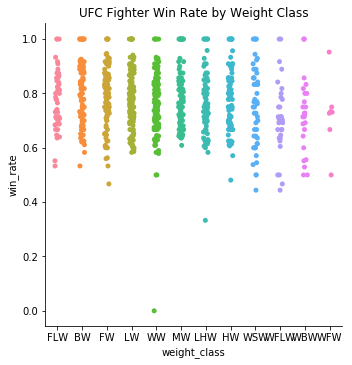

In [8]:
sea.catplot(x="weight_class", y="win_rate", data=dfAllFighters, order=weightClassOrder)
plt.title('UFC Fighter Win Rate by Weight Class')
plt.show()

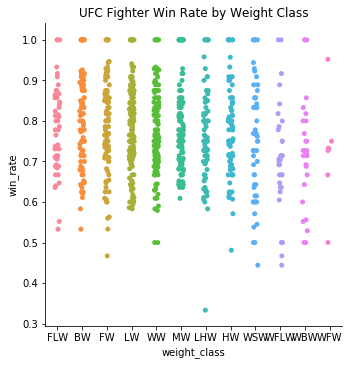

In [9]:
dfNotCmPunk = dfAllFighters[dfAllFighters['name'] != 'CM Punk']
sea.catplot(x="weight_class", y="win_rate", data=dfNotCmPunk, order=weightClassOrder)
plt.title('UFC Fighter Win Rate by Weight Class')
plt.show()

Text(0.5,1,'UFC Fighter Win Rate by Weight Class')

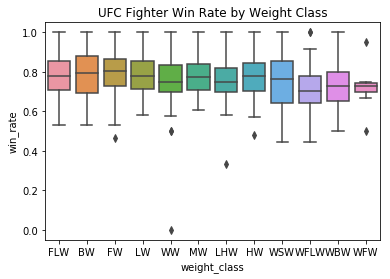

In [10]:
p = sea.boxplot(x="weight_class", y="win_rate", data=dfAllFighters, order=weightClassOrder)
p.set_title("UFC Fighter Win Rate by Weight Class")

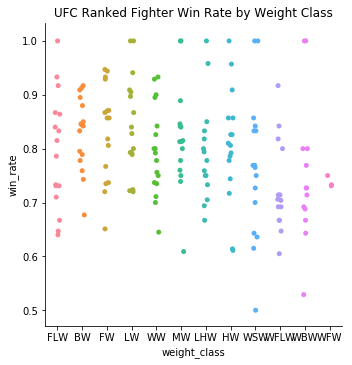

In [11]:
sea.catplot(x="weight_class", y="win_rate", data=dfRankedFighters, order=weightClassOrder)
plt.title('UFC Ranked Fighter Win Rate by Weight Class')
plt.show()

In [12]:
dfChampions = dfRankedFighters[dfRankedFighters['rank'] == 'C']

In [13]:
dfChampions = dfChampions.append(dfRankedFighters[dfRankedFighters['name'] == 'Daniel Cormier'])

In [14]:
temp = dfRankedFighters[dfRankedFighters['name'] == 'Amanda Nunes']
temp['weight_class'] = 'WFW'
dfChampions = dfChampions.append(temp)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'UFC Champion Win Rate by Weight Class')

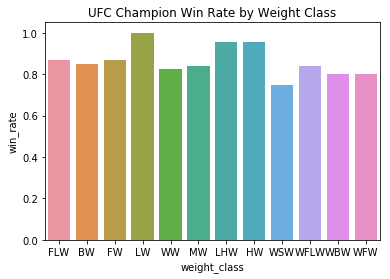

In [15]:
p = sea.barplot(x="weight_class", y="win_rate", data=dfChampions, order=weightClassOrder)
p.set_title("UFC Champion Win Rate by Weight Class")